In [ ]:
import pandas
import shioaji as sj
import matplotlib.pyplot as plt
# from shioaji.data import Kbars

In [ ]:
# 登入shioaji
api = sj.Shioaji()
api.login(
    person_id="id",
    passwd="pwd",
    # contracts_cb=lambda security_type: print(f"{repr(security_type)} fetch done."),
)

In [13]:
# 取得台積電的K線資料
kbars = api.kbars(api.Contracts.Stocks["2330"], start="2021-09-1", end="2021-09-23")
df = pandas.DataFrame({**kbars})
df.ts = pandas.to_datetime(df.ts)

print(df.tail())

      Volume   Open    Low   High                  ts  Close
3988       0  589.0  589.0  589.0 2021-09-23 13:26:00  589.0
3989       0  589.0  589.0  589.0 2021-09-23 13:27:00  589.0
3990       0  589.0  589.0  589.0 2021-09-23 13:28:00  589.0
3991       0  589.0  589.0  589.0 2021-09-23 13:29:00  589.0
3992    3606  588.0  588.0  588.0 2021-09-23 13:30:00  588.0


<AxesSubplot:xlabel='ts'>

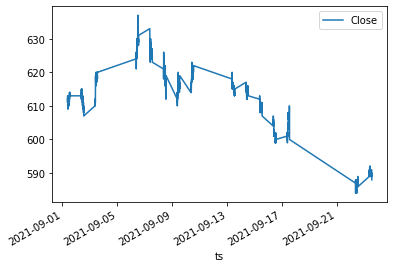

In [16]:
# 印出收盤價的圖
# 因為刻度為時間，所以開盤的k線圖很小
df.plot(x="ts", y="Close")

<AxesSubplot:>

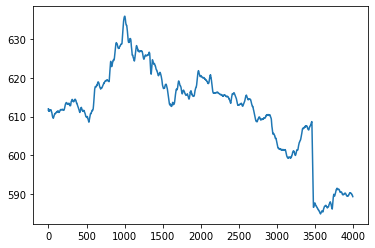

In [23]:
# 近20分收盤價圖
close_price_20 = df["Close"].rolling(20, min_periods=1).mean()
close_price_20.plot()